In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import wilcoxon

sns.set_style("whitegrid")

In [2]:
ls wt_rep4/

mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS305_end_LexA.txt
mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS305_plasmid.txt
mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS313_end_LexA.txt
mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS315_starting_LexA.txt
mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS316_end_LexA.txt
mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_in_vitro_nucl_array.txt
mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_plasmid313_4133_4058.txt
mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_plasmid315_1058_983.txt
mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_plasmid316_1586_1511.txt
wtrep4_minus_strand/
wtrep4_plus_strand/


In [3]:
load_dir = "wt_rep4"

In [4]:
ARS305_wt_rep4_ori = np.loadtxt(load_dir + "/mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS305_end_LexA.txt")
ARS305_wt_rep4_plasmid = np.loadtxt(load_dir + "/mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS305_plasmid.txt")

ARS313_wt_rep4_ori = np.loadtxt(load_dir + "/mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS313_end_LexA.txt")
ARS313_wt_rep4_plasmid = np.loadtxt(load_dir + "/mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_plasmid313_4133_4058.txt")

ARS315_wt_rep4_ori = np.loadtxt(load_dir + "/mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS315_starting_LexA.txt")
ARS315_wt_rep4_plasmid = np.loadtxt(load_dir + "/mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_plasmid315_1058_983.txt")

ARS316_wt_rep4_ori = np.loadtxt(load_dir + "/mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS316_end_LexA.txt")
ARS316_wt_rep4_plasmid = np.loadtxt(load_dir + "/mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_plasmid316_1586_1511.txt")

In [5]:
#summarise samples
array_dic = {"ARS305_ori": ARS305_wt_rep4_ori, 
             "ARS305_plasmid": ARS305_wt_rep4_plasmid,
             "ARS313_ori": ARS313_wt_rep4_ori,
             "ARS313_plasmid": ARS313_wt_rep4_plasmid,
             "ARS315_ori": ARS315_wt_rep4_ori,
             "ARS315_plasmid": ARS315_wt_rep4_plasmid,
             "ARS316_ori": ARS316_wt_rep4_ori,
             "ARS316_plasmid": ARS316_wt_rep4_plasmid,
             
            }

summary=pd.DataFrame()
for element in array_dic.keys():
    summary[element] = pd.DataFrame(array_dic[element].mean(axis=0)).describe()
summary = summary.T
summary["#molecules"] = [array_dic[sample].shape[0] for sample in summary.index]
summary["#nucleotides"] = [array_dic[sample].shape[1] for sample in summary.index]
#summary = summary.T
summary

,count,mean,std,min,25%,50%,75%,max,#molecules,#nucleotides
ARS305_ori,1084.0,0.053363,0.066960,0.0,0.011429,0.034286,0.068571,0.405714,175,1084
ARS305_plasmid,4624.0,0.149935,0.202501,0.0,0.000000,0.054054,0.216216,0.864865,37,4624
ARS313_ori,1036.0,0.048885,0.053467,0.0,0.012500,0.032500,0.062500,0.317500,400,1036
ARS313_plasmid,4785.0,0.148383,0.156095,0.0,0.029487,0.098718,0.208974,0.710897,1560,4785
ARS315_ori,1237.0,0.069117,0.080742,0.0,0.014446,0.038523,0.094703,0.451043,623,1237
ARS315_plasmid,4758.0,0.146689,0.197613,0.0,0.015385,0.052564,0.208814,0.858333,1560,4758
ARS316_ori,1240.0,0.052786,0.047699,0.0,0.015504,0.041344,0.075581,0.279070,387,1240
ARS316_plasmid,4785.0,0.154433,0.147075,0.0,0.033974,0.112821,0.233974,0.640385,1560,4785


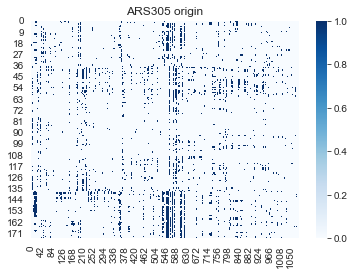

Text(0.5, 1.0, 'ARS305 plasmid')

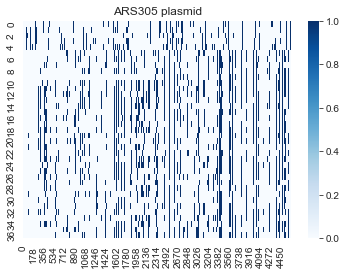

In [6]:
sns.heatmap(ARS305_wt_rep4_ori, cmap="Blues")
plt.title("ARS305 origin")
plt.show()

sns.heatmap(ARS305_wt_rep4_plasmid, cmap="Blues")
plt.title("ARS305 plasmid")

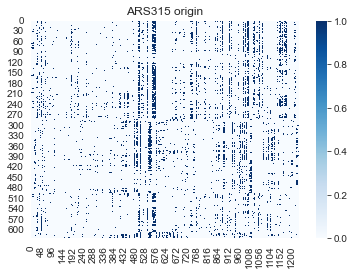

Text(0.5, 1.0, 'ARS315 plasmid')

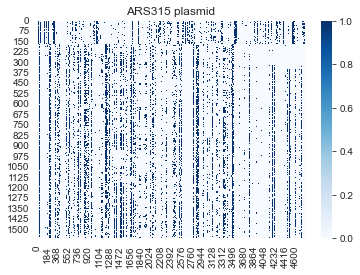

In [7]:
sns.heatmap(ARS315_wt_rep4_ori, cmap="Blues")
plt.title("ARS315 origin")
plt.show()

sns.heatmap(ARS315_wt_rep4_plasmid, cmap="Blues")
plt.title("ARS315 plasmid")

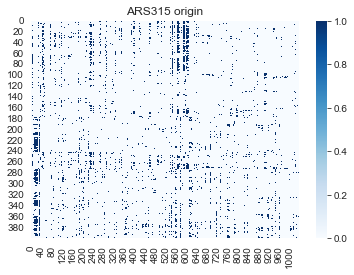

Text(0.5, 1.0, 'ARS315 plasmid')

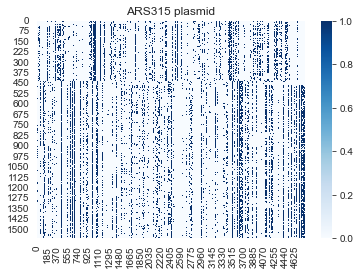

In [8]:
sns.heatmap(ARS313_wt_rep4_ori, cmap="Blues")
plt.title("ARS315 origin")
plt.show()

sns.heatmap(ARS313_wt_rep4_plasmid, cmap="Blues")
plt.title("ARS315 plasmid")

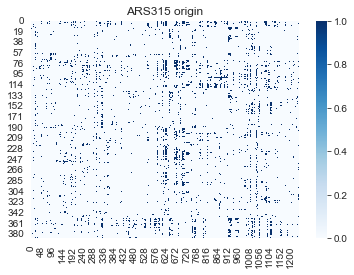

Text(0.5, 1.0, 'ARS315 plasmid')

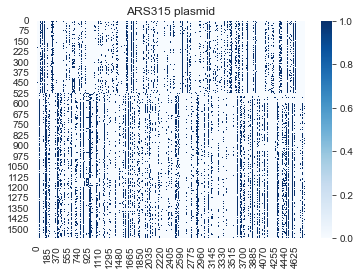

In [9]:
sns.heatmap(ARS316_wt_rep4_ori, cmap="Blues")
plt.title("ARS315 origin")
plt.show()

sns.heatmap(ARS316_wt_rep4_plasmid, cmap="Blues")
plt.title("ARS315 plasmid")

In [10]:
len(list(range(4081,4791)))

ARS305_wt_rep4_plasmid.mean(axis=0)[4081:4791].shape

(543,)

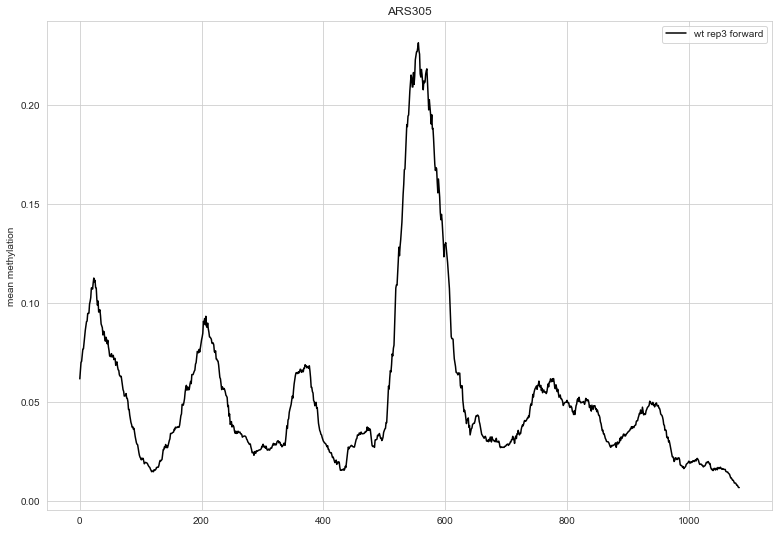

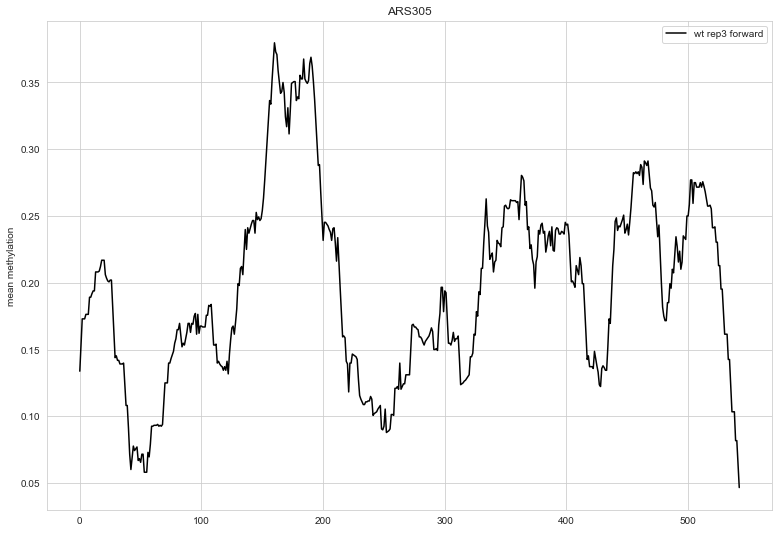

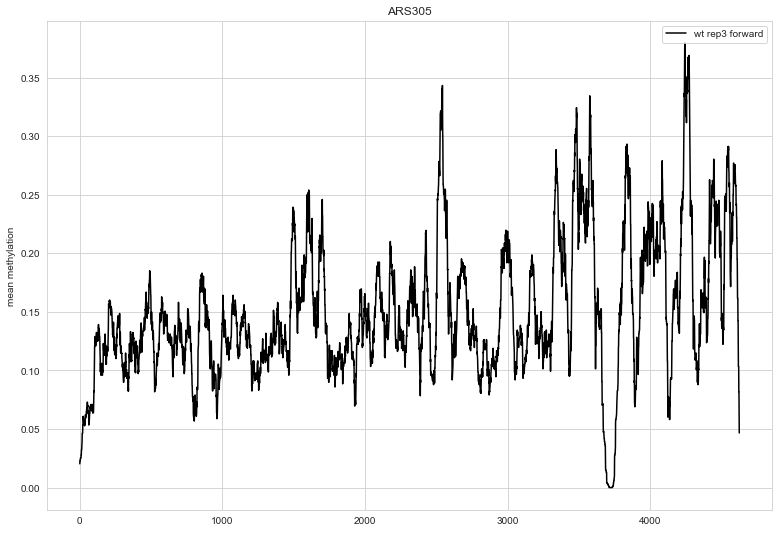

In [11]:
N=40

plt.figure(figsize=(13, 9))
sns.lineplot(x = range(1084), y = np.convolve(ARS305_wt_rep4_ori.mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="black", label="wt rep3 forward")
plt.ylabel("mean methylation")
plt.title("ARS305")
plt.show()

plt.figure(figsize=(13, 9))
sns.lineplot(x = range(543), y = np.convolve(ARS305_wt_rep4_plasmid.mean(axis=0)[4081:4791], np.ones(N)/N, mode ="same")
             , color ="black", label="wt rep3 forward")
plt.ylabel("mean methylation")
plt.title("ARS305")
plt.show()

plt.figure(figsize=(13, 9))
sns.lineplot(x = range(4624), y = np.convolve(ARS305_wt_rep4_plasmid.mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="black", label="wt rep3 forward")
plt.ylabel("mean methylation")
plt.title("ARS305")
plt.show()

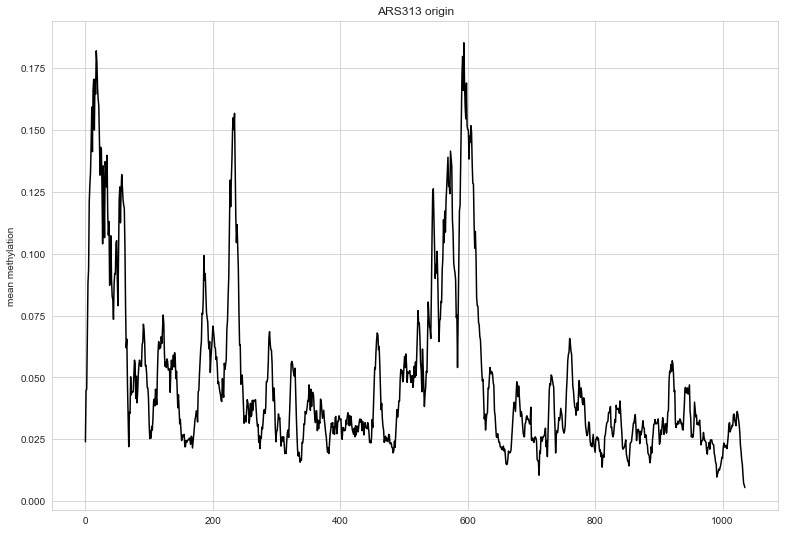

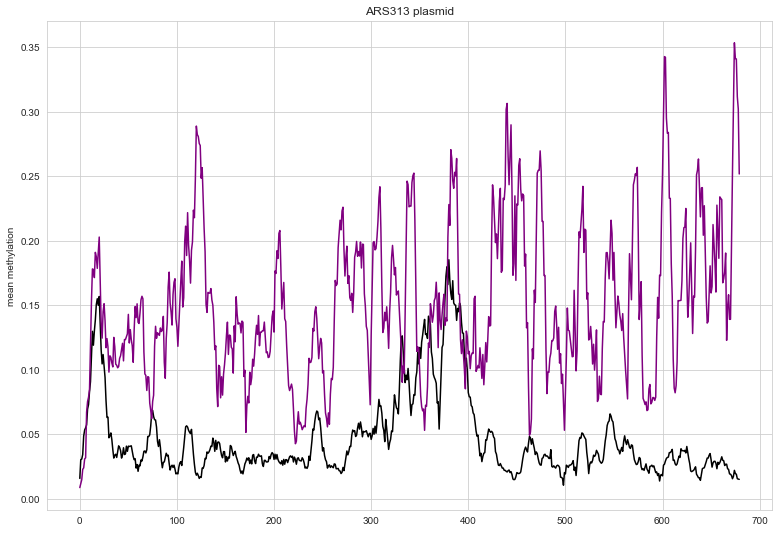

In [13]:
N=10

plt.figure(figsize=(13, 9))
sns.lineplot(x = range(ARS313_wt_rep4_ori.shape[1]), y = np.convolve(ARS313_wt_rep4_ori.mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="black")
plt.ylabel("mean methylation")
plt.title("ARS313 origin")
plt.show()

plt.figure(figsize=(13, 9))
sns.lineplot(x = range(680), 
             y = np.convolve(ARS313_wt_rep4_ori.mean(axis=0)[214:894], np.ones(N)/N, mode ="same")
             , color ="black")
sns.lineplot(x = range(680), y = np.convolve(ARS313_wt_rep4_plasmid.mean(axis=0)[:680], np.ones(N)/N, mode ="same")
             , color ="purple")
plt.ylabel("mean methylation")
plt.title("ARS313 plasmid")
plt.show()

In [51]:
len(list(range(214,894)))

680

## Separated strands, positive strand

In [18]:
load_dir_pl = "wt_rep4/wtrep4_plus_strand/"

ARS305_wt_rep4_ori_pl = np.loadtxt(load_dir_pl + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS305_end_LexA.txt")
ARS305_wt_rep4_plasmid_pl = np.loadtxt(load_dir_pl + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS305_plasmid.txt")

ARS313_wt_rep4_ori_pl = np.loadtxt(load_dir_pl + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS313_end_LexA.txt")
ARS313_wt_rep4_plasmid_pl = np.loadtxt(load_dir_pl + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_plasmid313_4133_4058.txt")

ARS315_wt_rep4_ori_pl = np.loadtxt(load_dir_pl + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS315_starting_LexA.txt")
ARS315_wt_rep4_plasmid_pl = np.loadtxt(load_dir_pl + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_plasmid315_1058_983.txt")

ARS316_wt_rep4_ori_pl = np.loadtxt(load_dir_pl + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS316_end_LexA.txt")
ARS316_wt_rep4_plasmid_pl = np.loadtxt(load_dir_pl + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_plasmid316_1586_1511.txt")

In [19]:
#summarise samples
array_dic = {"ARS305_ori": ARS305_wt_rep4_ori_pl, 
             "ARS305_plasmid": ARS305_wt_rep4_plasmid_pl,
             "ARS313_ori": ARS313_wt_rep4_ori_pl,
             "ARS313_plasmid": ARS313_wt_rep4_plasmid_pl,
             "ARS315_ori": ARS315_wt_rep4_ori_pl,
             "ARS315_plasmid": ARS315_wt_rep4_plasmid_pl,
             "ARS316_ori": ARS316_wt_rep4_ori_pl,
             "ARS316_plasmid": ARS316_wt_rep4_plasmid_pl,
             
            }

summary=pd.DataFrame()
for element in array_dic.keys():
    summary[element] = pd.DataFrame(array_dic[element].mean(axis=0)).describe()
summary = summary.T
summary["#molecules"] = [array_dic[sample].shape[0] for sample in summary.index]
summary["#nucleotides"] = [array_dic[sample].shape[1] for sample in summary.index]
#summary = summary.T
summary

,count,mean,std,min,25%,50%,75%,max,#molecules,#nucleotides
ARS305_ori,1084.0,0.053363,0.066960,0.0,0.011429,0.034286,0.068571,0.405714,175,1084
ARS305_plasmid,4624.0,0.149935,0.202501,0.0,0.000000,0.054054,0.216216,0.864865,37,4624
ARS313_ori,1036.0,0.048885,0.053467,0.0,0.012500,0.032500,0.062500,0.317500,400,1036
ARS313_plasmid,4785.0,0.148383,0.156095,0.0,0.029487,0.098718,0.208974,0.710897,1560,4785
ARS315_ori,1237.0,0.069117,0.080742,0.0,0.014446,0.038523,0.094703,0.451043,623,1237
ARS315_plasmid,4758.0,0.146689,0.197613,0.0,0.015385,0.052564,0.208814,0.858333,1560,4758
ARS316_ori,1240.0,0.052786,0.047699,0.0,0.015504,0.041344,0.075581,0.279070,387,1240
ARS316_plasmid,4785.0,0.154433,0.147075,0.0,0.033974,0.112821,0.233974,0.640385,1560,4785


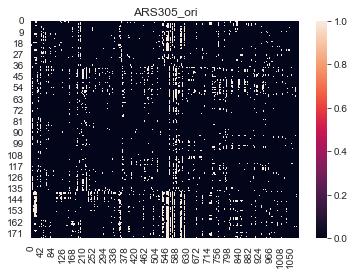

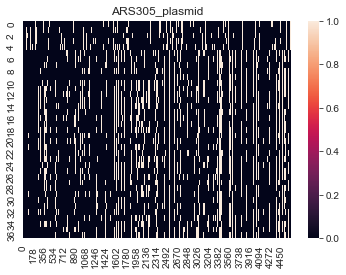

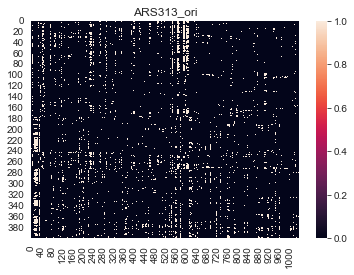

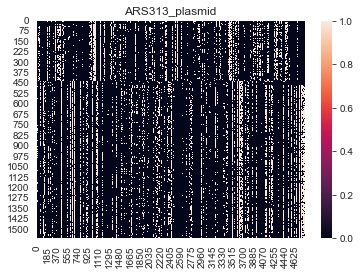

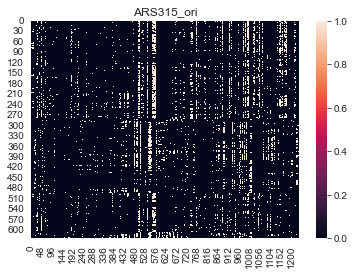

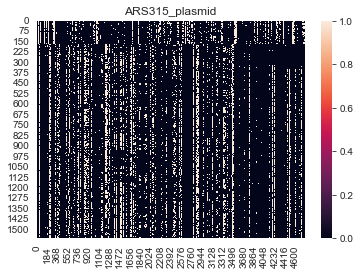

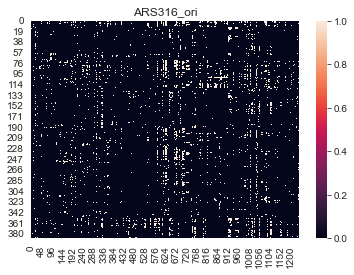

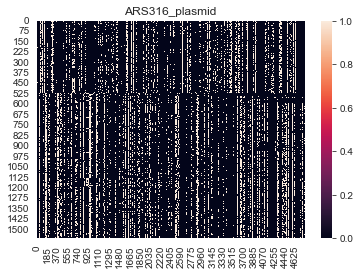

In [22]:
for element in array_dic.keys():
    sns.heatmap(array_dic[element])
    plt.title(element)
    plt.show()

## The negative strand

In [26]:
load_dir_neg = "wt_rep4/wtrep4_minus_strand/"

ARS305_wt_rep4_ori_neg = np.loadtxt(load_dir_neg + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS305_end_LexA.txt")
ARS305_wt_rep4_plasmid_neg = np.loadtxt(load_dir_neg + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS305_plasmid.txt")

ARS313_wt_rep4_ori_neg = np.loadtxt(load_dir_neg + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS313_end_LexA.txt")
ARS313_wt_rep4_plasmid_neg = np.loadtxt(load_dir_neg + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_plasmid313_4133_4058.txt")

ARS315_wt_rep4_ori_neg = np.loadtxt(load_dir_neg + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS315_starting_LexA.txt")
ARS315_wt_rep4_plasmid_neg = np.loadtxt(load_dir_neg + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_plasmid315_1058_983.txt")

ARS316_wt_rep4_ori_neg = np.loadtxt(load_dir_neg + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS316_end_LexA.txt")
ARS316_wt_rep4_plasmid_neg = np.loadtxt(load_dir_neg + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_plasmid316_1586_1511.txt")

In [27]:
#summarise samples
array_dic = {"ARS305_ori": ARS305_wt_rep4_ori_neg, 
             "ARS305_plasmid": ARS305_wt_rep4_plasmid_neg,
             "ARS313_ori": ARS313_wt_rep4_ori_neg,
             "ARS313_plasmid": ARS313_wt_rep4_plasmid_neg,
             "ARS315_ori": ARS315_wt_rep4_ori_neg,
             "ARS315_plasmid": ARS315_wt_rep4_plasmid_neg,
             "ARS316_ori": ARS316_wt_rep4_ori_neg,
             "ARS316_plasmid": ARS316_wt_rep4_plasmid_neg,
             
            }

summary=pd.DataFrame()
for element in array_dic.keys():
    summary[element] = pd.DataFrame(array_dic[element].mean(axis=0)).describe()
summary = summary.T
summary["#molecules"] = [array_dic[sample].shape[0] for sample in summary.index]
summary["#nucleotides"] = [array_dic[sample].shape[1] for sample in summary.index]
#summary = summary.T
summary

,count,mean,std,min,25%,50%,75%,max,#molecules,#nucleotides
ARS305_ori,1083.0,0.062165,0.129508,0.0,0.0,0.0,0.067568,0.797297,74,1083
ARS305_plasmid,4624.0,0.150533,0.244998,0.0,0.0,0.0,0.250000,1.000000,32,4624
ARS313_ori,1036.0,0.047740,0.085925,0.0,0.0,0.0,0.063802,0.661458,192,1036
ARS313_plasmid,4784.0,0.152363,0.236037,0.0,0.0,0.0,0.256098,0.980836,574,4784
ARS315_ori,1237.0,0.070427,0.130755,0.0,0.0,0.0,0.084615,0.720513,390,1237
ARS315_plasmid,4758.0,0.156626,0.248502,0.0,0.0,0.0,0.254630,0.986111,216,4758
ARS316_ori,1240.0,0.052321,0.093318,0.0,0.0,0.0,0.073171,0.658537,164,1240
ARS316_plasmid,4782.0,0.158132,0.247535,0.0,0.0,0.0,0.266968,0.992459,663,4782


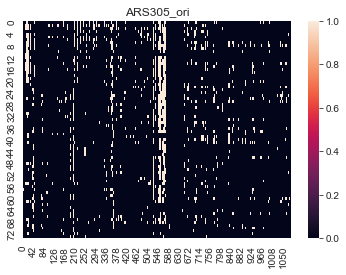

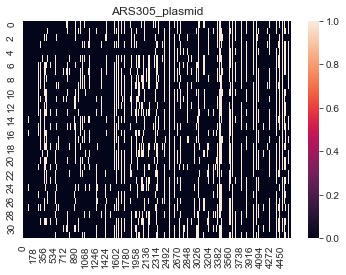

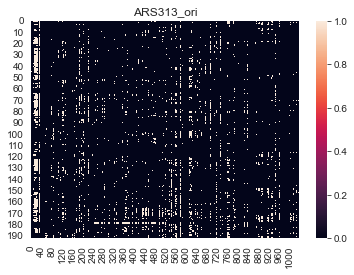

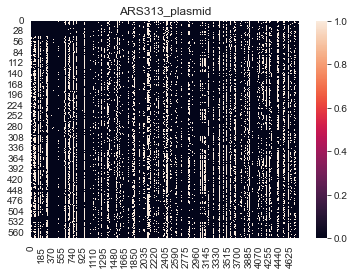

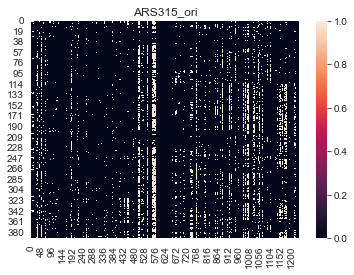

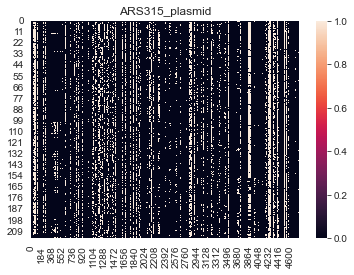

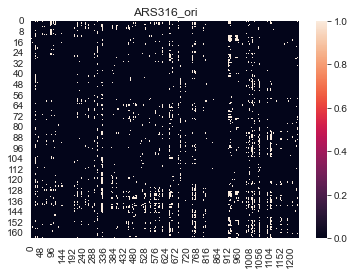

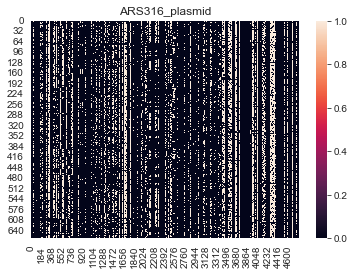

In [28]:
for element in array_dic.keys():
    sns.heatmap(array_dic[element])
    plt.title(element)
    plt.show()

In [29]:
ls "wt_rep4/test/"

mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS313_end_LexA.txt
mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS315_starting_LexA.txt
mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_plasmid313_4133_4058.txt


In [30]:
###Test

load_dir_neg = "wt_rep4/test/"

ARS313_wt_rep4_ori_neg = np.loadtxt(load_dir_neg + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS313_end_LexA.txt")
ARS313_wt_rep4_plasmid_neg = np.loadtxt(load_dir_neg + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_plasmid313_4133_4058.txt")

ARS315_wt_rep4_ori_neg = np.loadtxt(load_dir_neg + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS315_starting_LexA.txt")

In [31]:
#summarise samples
array_dic = {"ARS313_ori": ARS313_wt_rep4_ori_neg,
             "ARS313_plasmid": ARS313_wt_rep4_plasmid_neg,
             "ARS315_ori": ARS315_wt_rep4_ori_neg             
            }

summary=pd.DataFrame()
for element in array_dic.keys():
    summary[element] = pd.DataFrame(array_dic[element].mean(axis=0)).describe()
summary = summary.T
summary["#molecules"] = [array_dic[sample].shape[0] for sample in summary.index]
summary["#nucleotides"] = [array_dic[sample].shape[1] for sample in summary.index]
#summary = summary.T
summary

,count,mean,std,min,25%,50%,75%,max,#molecules,#nucleotides
ARS313_ori,1033.0,0.050087,0.093302,0.0,0.0,0.0,0.062500,0.600962,208,1033
ARS313_plasmid,4785.0,0.147191,0.236290,0.0,0.0,0.0,0.229313,0.982468,1426,4785
ARS315_ori,1236.0,0.066978,0.120447,0.0,0.0,0.0,0.081545,0.721030,233,1236


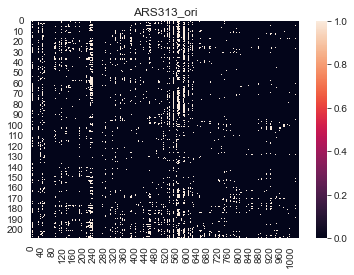

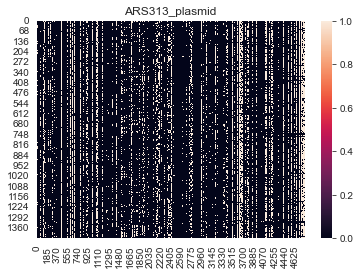

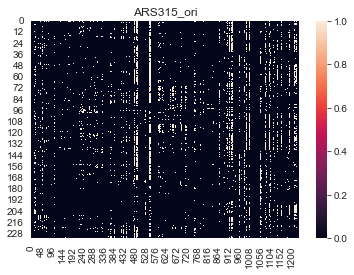

In [32]:
for element in array_dic.keys():
    sns.heatmap(array_dic[element])
    plt.title(element)
    plt.show()